<a href="https://colab.research.google.com/github/IshuDhana/git-practice/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
# ============================
# Step 1: Import Libraries
# ============================
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
# ============================
# Step 2: Load and Preprocess Data
# ============================

# Load CIFAR-10 dataset
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [41]:
# Normalize pixel values to [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0


In [42]:
# One-hot encode labels
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [43]:
# Input image shape
input_shape = x_train.shape[1:]  # (32, 32, 3)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


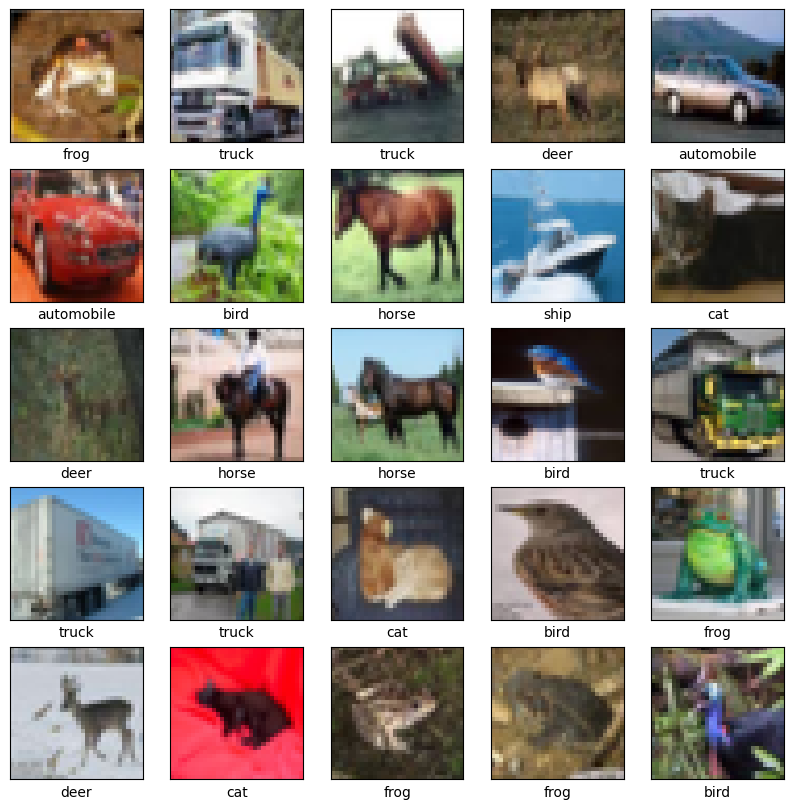

In [44]:
# ============================
# Step 3: Visualize Some Images
# ============================
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[np.argmax(y_train[i])])
plt.show()

In [45]:
# ============================
# Step 4: Define Hyperparameters
# ============================
learning_rate = 0.001
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
epochs = 10 #50
batch_size = 64 #32

print("\n--- Hyperparameters ---")
print(f"Learning Rate: {learning_rate}")
print(f"Optimizer: Adam")
print(f"Epochs: {epochs}")
print(f"Batch Size: {batch_size}\n")


--- Hyperparameters ---
Learning Rate: 0.001
Optimizer: Adam
Epochs: 10
Batch Size: 64



In [47]:
# ============================
# Step 5: Build CNN Model
# ============================
model = keras.Sequential([
    layers.Input(shape=input_shape),

    # Conv Block 1
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    # Conv Block 2
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    # Conv Block 3
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    #32, 64, 128

    # Fully Connected Layers
    layers.Dropout(0.5),  #0.02
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Print architecture summary
print("\n--- Model Architecture ---")
model.summary()



--- Model Architecture ---


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 595,498 (2.27 MB)

 Trainable params: 595,498 (2.27 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
# ============================
# Step 6: Compile Model
# ============================
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [49]:
# ============================
# Step 7: Train Model & Measure Time
# ============================
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True
)

start_time = time.time()
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1,
    callbacks=[early_stop]
)
end_time = time.time()

training_time = end_time - start_time
print(f"\nTraining Time: {training_time/60:.2f} minutes")


Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.2889 - loss: 1.8855 - val_accuracy: 0.5200 - val_loss: 1.3293
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5160 - loss: 1.3334 - val_accuracy: 0.6004 - val_loss: 1.1236
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5874 - loss: 1.1485 - val_accuracy: 0.6734 - val_loss: 0.9553
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6342 - loss: 1.0261 - val_accuracy: 0.6748 - val_loss: 0.9555
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6574 - loss: 0.9637 - val_accuracy: 0.7110 - val_loss: 0.8491
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6749 - loss: 0.9115 - val_accuracy: 0.6958 - val_loss: 0.9021
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6998 - loss: 0.8569 - val_accuracy: 0.7270 - val_loss: 0.8018
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7069 - loss: 0.8291 - val_accuracy: 

In [50]:
# ============================
# Step 8: Evaluate Model
# ============================
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

313/313 - 1s - 5ms/step - accuracy: 0.7387 - loss: 0.7659

Test Accuracy: 0.7387
Test Loss: 0.7659


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


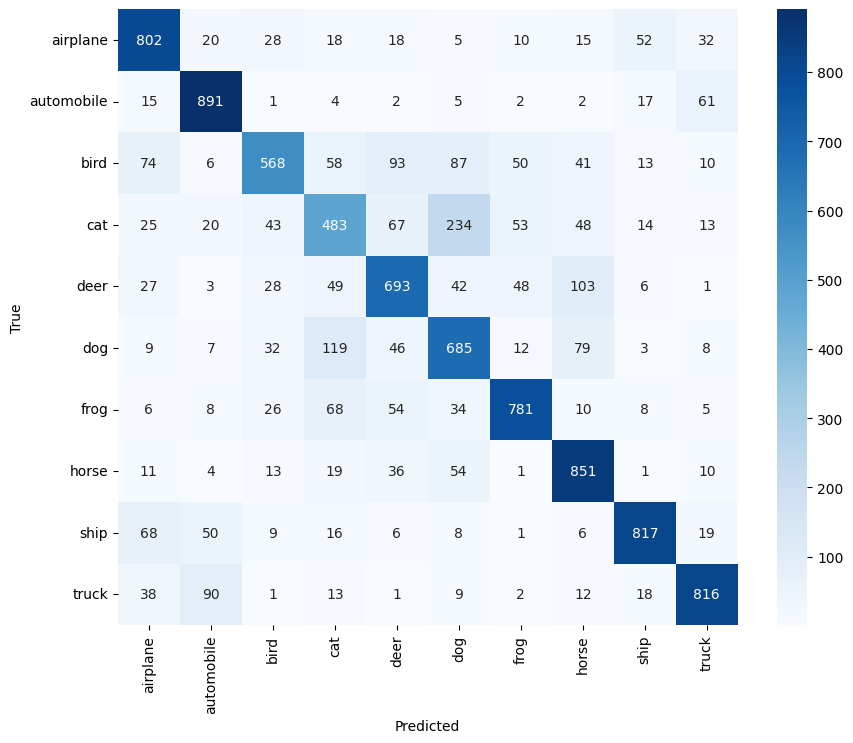

In [51]:
# ============================
# Step 9: Classification Metrics
# ============================
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [52]:
# Classification report
report = classification_report(y_true, y_pred_classes, target_names=class_names)
print("\n--- Classification Report ---")
print(report)



--- Classification Report ---
              precision    recall  f1-score   support

    airplane       0.75      0.80      0.77      1000
  automobile       0.81      0.89      0.85      1000
        bird       0.76      0.57      0.65      1000
         cat       0.57      0.48      0.52      1000
        deer       0.68      0.69      0.69      1000
         dog       0.59      0.69      0.63      1000
        frog       0.81      0.78      0.80      1000
       horse       0.73      0.85      0.79      1000
        ship       0.86      0.82      0.84      1000
       truck       0.84      0.82      0.83      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,341,226 (5.12 MB)

 Trainable params: 1,341,226 (5.12 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


703/703 ━━━━━━━━━━━━━━━━━━━━ 38s 47ms/step - accuracy: 0.2628 - loss: 1.9618 - val_accuracy: 0.4982 - val_loss: 1.3453
Epoch 2/20
  1/703 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.5000 - loss: 1.5461

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 788us/step - accuracy: 0.5000 - loss: 1.5461 - val_accuracy: 0.5028 - val_loss: 1.3308
Epoch 3/20
703/703 ━━━━━━━━━━━━━━━━━━━━ 28s 40ms/step - accuracy: 0.4956 - loss: 1.3854 - val_accuracy: 0.5860 - val_loss: 1.1330
Epoch 4/20
703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 714us/step - accuracy: 0.5781 - loss: 1.4168 - val_accuracy: 0.5902 - val_loss: 1.1353
Epoch 5/20
703/703 ━━━━━━━━━━━━━━━━━━━━ 27s 39ms/step - accuracy: 0.5764 - loss: 1.1847 - val_accuracy: 0.6378 - val_loss: 1.0095
Epoch 6/20
703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 709us/step - accuracy: 0.6562 - loss: 1.0622 - val_accuracy: 0.6570 - val_loss: 0.9722
Epoch 7/20
703/703 ━━━━━━━━━━━━━━━━━━━━ 28s 40ms/step - accuracy: 0.6192 - loss: 1.0805 - val_accuracy: 0.6802 - val_loss: 0.8941
Epoch 8/20
703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step - accuracy: 0.6562 - loss: 1.0516 - val_accuracy: 0.6808 - val_loss: 0.8936
Epoch 9/20
703/703 ━━━━━━━━━━━━━━━━━━━━ 27s 39ms/step - accuracy: 0.6464 - loss: 1.0002 - val_accurac

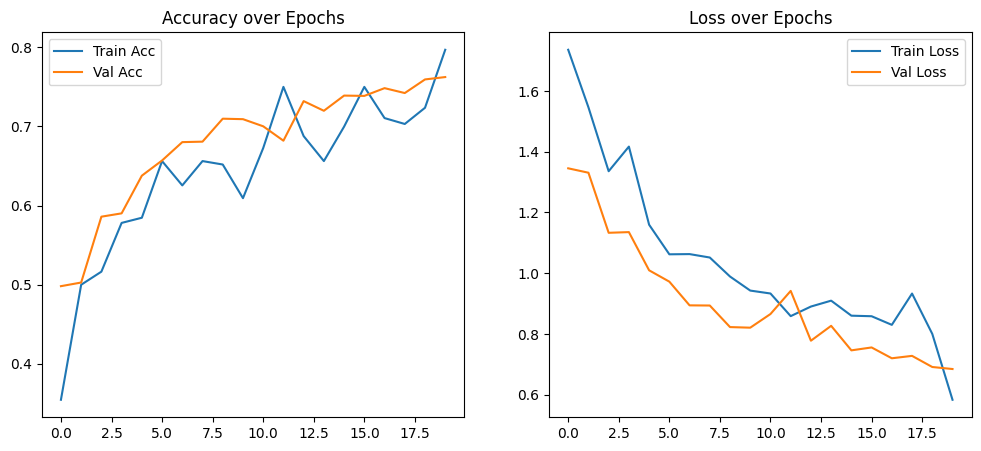

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


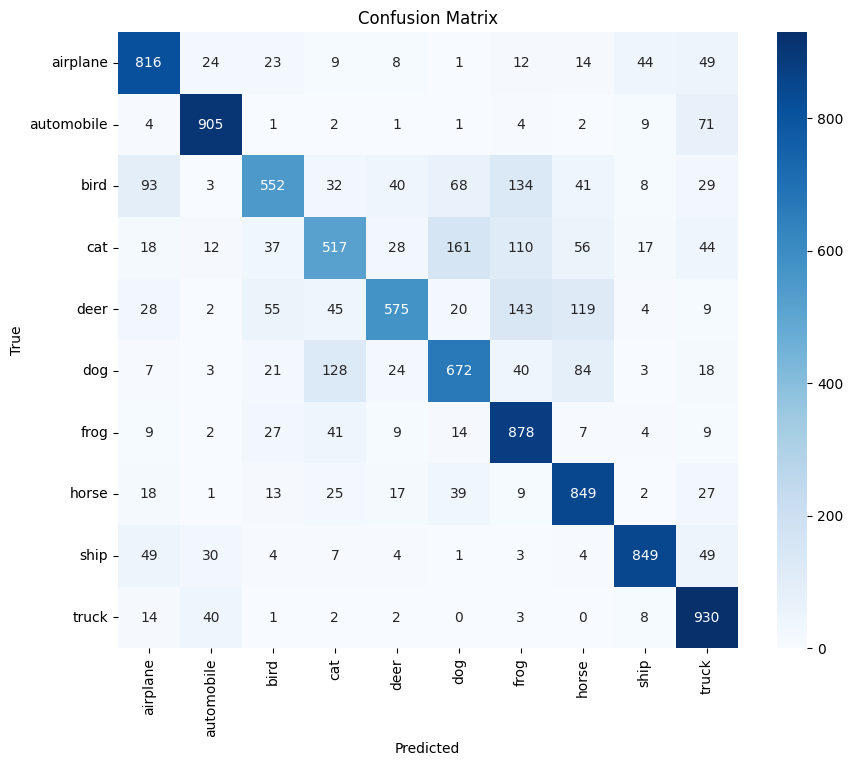


--- Classification Report ---
              precision    recall  f1-score   support

    airplane       0.77      0.82      0.79      1000
  automobile       0.89      0.91      0.90      1000
        bird       0.75      0.55      0.64      1000
         cat       0.64      0.52      0.57      1000
        deer       0.81      0.57      0.67      1000
         dog       0.69      0.67      0.68      1000
        frog       0.66      0.88      0.75      1000
       horse       0.72      0.85      0.78      1000
        ship       0.90      0.85      0.87      1000
       truck       0.75      0.93      0.83      1000

    accuracy                           0.75     10000
   macro avg       0.76      0.75      0.75     10000
weighted avg       0.76      0.75      0.75     10000



In [54]:
# ============================
# CIFAR-10 CNN (with Data Augmentation + Manual Validation Split)
# ============================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# ============================
# Step 1: Load CIFAR-10 Dataset
# ============================
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Convert labels to one-hot encoding
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

input_shape = x_train.shape[1:]

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")

# ============================
# Step 2: Hyperparameters (TUNE THESE)
# ============================
learning_rate = 0.001      # 🔹 Try 0.0005 or 0.002
epochs = 20                # 🔹 Try 30 for better accuracy
batch_size = 64            # 🔹 32 slower but sometimes better
dropout_rate = 0.5         # 🔹 0.3–0.6 range

optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

# ============================
# Step 3: Data Augmentation
# ============================
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

# ============================
# Step 4: Manual Validation Split
# ============================
x_train_sub, x_val, y_train_sub, y_val = train_test_split(
    x_train, y_train, test_size=0.1, random_state=42
)

# ============================
# Step 5: Build CNN Model
# ============================
model = keras.Sequential([
    layers.Input(shape=input_shape),

    # --- Conv Block 1 ---
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    # --- Conv Block 2 ---
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    # --- Conv Block 3 ---
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    # --- Dense Layers ---
    layers.Dropout(dropout_rate),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(dropout_rate),
    layers.Dense(num_classes, activation='softmax')
])

# ============================
# Step 6: Compile Model
# ============================
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# ============================
# Step 7: Train Model
# ============================
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

start_time = time.time()

history = model.fit(
    datagen.flow(x_train_sub, y_train_sub, batch_size=batch_size),
    steps_per_epoch=x_train_sub.shape[0] // batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[early_stop],
    verbose=1
)

end_time = time.time()
print(f"\nTraining Time: {(end_time - start_time)/60:.2f} minutes")

# ============================
# Step 8: Evaluate Model
# ============================
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# ============================
# Step 9: Plot Accuracy and Loss
# ============================
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()

# ============================
# Step 10: Classification Metrics
# ============================
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_true, y_pred_classes),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\n--- Classification Report ---")
print(classification_report(y_true, y_pred_classes, target_names=class_names))
